In [1]:
import sys
import numpy as np
import pandas as pd
import sklearn
import tensorflow
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

pd.

dir_data = "G:/내 드라이브/kamp/data"

## 데이터 전처리와 EDA

In [2]:
print("Python version :", sys.version)
print("numpy version :", np.__version__)
print("pandas version :", pd.__version__)
print("sklearn version :", sklearn.__version__)
print("tensorflow version :", tensorflow.__version__)

Python version : 3.11.3 | packaged by Anaconda, Inc. | (main, May 15 2023, 15:41:31) [MSC v.1916 64 bit (AMD64)]
numpy version : 1.24.3
pandas version : 2.0.3
sklearn version : 1.2.0
tensorflow version : 2.13.0


In [22]:
# df_feat = pd.read_csv(dir_data+"/train.csv", encoding='cp949')

# df_feat.info()
# df_feat.head()

In [23]:
# df_feat["Unnamed: 0"].unique()

In [5]:
df_qual = pd.read_excel(dir_data+"/quality.xlsx")

df_qual.info()
df_qual.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   배정번호    136 non-null    int64         
 1   작업일     136 non-null    datetime64[ns]
 2   공정명     136 non-null    object        
 3   설비명     136 non-null    object        
 4   양품수량    136 non-null    int64         
 5   불량수량    136 non-null    int64         
 6   총수량     136 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 7.6+ KB


,배정번호,작업일,공정명,설비명,양품수량,불량수량,총수량
0,102410,2022-01-03,열처리,열처리 염욕_1,15160,3,15163
1,102585,2022-01-03,열처리,열처리 염욕_1,29892,10,29902
2,102930,2022-01-04,열처리,열처리 염욕_1,59616,30,59646
3,103142,2022-01-05,열처리,열처리 염욕_1,74730,13,74743
4,103675,2022-01-06,열처리,열처리 염욕_1,14979,2,14981


In [24]:
df = pd.read_csv(dir_data+"/data.csv", encoding="cp949")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2939722 entries, 0 to 2939721
Data columns (total 21 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TAG_MIN            object 
 1   배정번호               int64  
 2   건조 1존 OP           float64
 3   건조 2존 OP           float64
 4   건조로 온도 1 Zone      float64
 5   건조로 온도 2 Zone      float64
 6   세정기                float64
 7   소입1존 OP            float64
 8   소입2존 OP            float64
 9   소입3존 OP            float64
 10  소입4존 OP            float64
 11  소입로 CP 값           float64
 12  소입로 CP 모니터 값       float64
 13  소입로 온도 1 Zone      float64
 14  소입로 온도 2 Zone      float64
 15  소입로 온도 3 Zone      float64
 16  소입로 온도 4 Zone      float64
 17  솔트 컨베이어 온도 1 Zone  float64
 18  솔트 컨베이어 온도 2 Zone  float64
 19  솔트조 온도 1 Zone      float64
 20  솔트조 온도 2 Zone      float64
dtypes: float64(19), int64(1), object(1)
memory usage: 471.0+ MB


,TAG_MIN,배정번호,건조 1존 OP,건조 2존 OP,건조로 온도 1 Zone,건조로 온도 2 Zone,세정기,소입1존 OP,소입2존 OP,소입3존 OP,...,소입로 CP 값,소입로 CP 모니터 값,소입로 온도 1 Zone,소입로 온도 2 Zone,소입로 온도 3 Zone,소입로 온도 4 Zone,솔트 컨베이어 온도 1 Zone,솔트 컨베이어 온도 2 Zone,솔트조 온도 1 Zone,솔트조 온도 2 Zone
0,2022-01-03 11:22:07,102410,75.6648,30.0155,NaN,NaN,68.4386,72.84030,59.7862,51.71690,...,0.450421,NaN,NaN,859.854,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-03 11:22:08,102410,75.6706,32.2732,NaN,NaN,68.4386,78.44150,61.6286,50.44530,...,0.450356,1.146260e-10,860.338,859.780,860.044,859.786,294.658,272.538,328.734,328.865
2,2022-01-03 11:22:09,102410,75.6776,32.1592,98.8533,99.14600,68.4386,78.10990,61.5414,52.01960,...,0.450341,1.145200e-10,860.338,859.780,859.981,859.724,294.658,272.538,328.734,328.805
3,2022-01-03 11:22:11,102410,75.8656,30.8312,98.7918,99.17675,68.4999,77.50725,60.6663,52.69425,...,0.450201,1.144670e-10,860.338,859.842,859.950,859.599,294.719,272.538,328.674,328.865
4,2022-01-03 11:22:12,102410,73.6468,29.5274,98.7918,99.20750,68.4386,76.02620,61.1634,51.69150,...,0.450235,1.145360e-10,860.351,859.791,859.991,859.731,294.721,272.599,328.740,328.808


In [37]:
df.describe()

,배정번호,건조 1존 OP,건조 2존 OP,건조로 온도 1 Zone,건조로 온도 2 Zone,세정기,소입1존 OP,소입2존 OP,소입3존 OP,소입4존 OP,소입로 CP 값,소입로 CP 모니터 값,소입로 온도 1 Zone,소입로 온도 2 Zone,소입로 온도 3 Zone,소입로 온도 4 Zone,솔트 컨베이어 온도 1 Zone,솔트 컨베이어 온도 2 Zone,솔트조 온도 1 Zone,솔트조 온도 2 Zone
count,2.939722e+06,2.939721e+06,2.939721e+06,2.939606e+06,2.939574e+06,2.939631e+06,2.935434e+06,2.939722e+06,2.939720e+06,2.939719e+06,2.939721e+06,2.939575e+06,2.939592e+06,2.939594e+06,2.939565e+06,2.939552e+06,2.939616e+06,2.939580e+06,2.939513e+06,2.939519e+06
mean,1.284422e+05,6.989404e+01,2.044708e+01,1.000061e+02,1.000198e+02,6.771864e+01,7.564373e+01,5.486239e+01,5.386029e+01,7.108925e+01,4.488618e-01,1.145580e-10,8.592077e+02,8.600021e+02,8.600029e+02,8.600062e+02,2.839963e+02,2.799293e+02,3.318062e+02,3.321773e+02
std,1.263704e+04,4.014802e+00,5.217123e+00,4.360371e-01,3.623526e-01,1.630768e+00,2.516083e+01,4.429079e+00,2.664304e+00,2.556959e+00,1.886477e-02,6.012797e-13,3.647667e+00,5.578480e-01,3.518205e-01,4.551778e-01,9.512770e+00,6.611579e+00,7.827379e-01,8.732977e-01
min,1.024100e+05,4.725320e+01,1.188830e-04,9.734210e+01,9.787060e+01,6.062440e+01,8.500550e-04,8.620010e+00,4.370450e-02,6.244200e-03,5.096370e-03,1.116620e-10,8.402980e+02,8.559290e+02,8.582800e+02,8.579920e+02,2.662300e+02,2.664260e+02,3.281610e+02,3.280730e+02
25%,1.194480e+05,6.842880e+01,1.891760e+01,9.981440e+01,9.989010e+01,6.656940e+01,6.496270e+01,5.332590e+01,5.238910e+01,6.967810e+01,4.484415e-01,1.142615e-10,8.579490e+02,8.597760e+02,8.598290e+02,8.598430e+02,2.747540e+02,2.735020e+02,3.318670e+02,3.321780e+02
50%,1.298890e+05,7.051660e+01,2.129310e+01,1.000020e+02,1.000190e+02,6.769720e+01,8.221040e+01,5.566540e+01,5.388620e+01,7.104540e+01,4.500620e-01,1.145550e-10,8.595750e+02,8.600220e+02,8.600020e+02,8.600000e+02,2.845860e+02,2.800200e+02,3.320170e+02,3.324230e+02
75%,1.391160e+05,7.237810e+01,2.338840e+01,1.001910e+02,1.001610e+02,6.897990e+01,9.536660e+01,5.757330e+01,5.541450e+01,7.247710e+01,4.517070e-01,1.148440e-10,8.602580e+02,8.602490e+02,8.601720e+02,8.601580e+02,2.933430e+02,2.863340e+02,3.321410e+02,3.326260e+02
max,1.480690e+05,8.729950e+01,4.753950e+01,1.024690e+02,1.018430e+02,7.149010e+01,1.000000e+02,7.727090e+01,6.601500e+01,8.739070e+01,9.091110e-01,1.329290e-10,8.772280e+02,8.660340e+02,8.701190e+02,8.821480e+02,2.985300e+02,2.916960e+02,3.327170e+02,3.331790e+02


In [25]:
# df의 결측치 갯수

num_null_test = len(df[df.isnull().any(axis=1)])

print("df의 결측치 수 =", str(num_null_test))

print("test data 중 결측치 비율 =",str(round(num_null_test/df.shape[0],4)))

df의 결측치 수 = 4677
test data 중 결측치 비율 = 0.0016


In [26]:
df.isnull().sum()

TAG_MIN                 0
배정번호                    0
건조 1존 OP                1
건조 2존 OP                1
건조로 온도 1 Zone         116
건조로 온도 2 Zone         148
세정기                    91
소입1존 OP              4288
소입2존 OP                 0
소입3존 OP                 2
소입4존 OP                 3
소입로 CP 값                1
소입로 CP 모니터 값          147
소입로 온도 1 Zone         130
소입로 온도 2 Zone         128
소입로 온도 3 Zone         157
소입로 온도 4 Zone         170
솔트 컨베이어 온도 1 Zone     106
솔트 컨베이어 온도 2 Zone     142
솔트조 온도 1 Zone         209
솔트조 온도 2 Zone         203
dtype: int64

결측치가 전체 데이터의 0.16%여서 데이터를 제거하고 가도 분석하는데 큰 영향을 끼치지 않을 것으로 예상  
그러나 한 배정 번호에 결측치가 어느 정도 차지하는지 확인해야 함

In [27]:
df_gb = df.groupby("배정번호").count()

In [28]:
df_gb

,TAG_MIN,건조 1존 OP,건조 2존 OP,건조로 온도 1 Zone,건조로 온도 2 Zone,세정기,소입1존 OP,소입2존 OP,소입3존 OP,소입4존 OP,소입로 CP 값,소입로 CP 모니터 값,소입로 온도 1 Zone,소입로 온도 2 Zone,소입로 온도 3 Zone,소입로 온도 4 Zone,솔트 컨베이어 온도 1 Zone,솔트 컨베이어 온도 2 Zone,솔트조 온도 1 Zone,솔트조 온도 2 Zone
배정번호,,,,,,,,,,,,,,,,,,,,
102410,7342,7342,7342,7340,7340,7342,7342,7342,7342,7342,7342,7341,7341,7342,7341,7341,7341,7341,7341,7341
102585,13299,13299,13299,13299,13299,13299,13120,13299,13299,13299,13299,13299,13299,13299,13299,13299,13299,13299,13299,13299
102930,26982,26982,26982,26980,26974,26982,26982,26982,26982,26982,26982,26981,26980,26981,26981,26982,26981,26982,26981,26981
103142,31729,31729,31729,31727,31727,31727,31729,31729,31729,31729,31729,31727,31728,31728,31727,31727,31729,31727,31727,31728
103675,6218,6218,6218,6218,6218,6218,6218,6218,6218,6218,6218,6216,6218,6218,6216,6216,6218,6218,6217,6217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147292,20151,20151,20151,20151,20151,20151,20151,20151,20151,20151,20151,20151,20147,20151,20151,20145,20142,20148,20151,20146
147546,27651,27651,27651,27649,27651,27651,27651,27651,27651,27651,27651,27651,27651,27649,27651,27649,27649,27650,27649,27649
147982,18558,18558,18558,18558,18557,18558,18558,18558,18558,18558,18558,18558,18557,18557,18558,18557,18558,18557,18557,18557


In [29]:
Listmin = []
Listmax = []

for k in range(df_gb.shape[0]) : 
    val_min = df_gb.iloc[k].min()
    val_max = df_gb.iloc[k].max()

    Listmin.append(val_min)
    Listmax.append(val_max)

List_ratio_dif = [(round(m/M,2),M-m) for m, M in zip(Listmin, Listmax)]

In [30]:
List_ratio_dif

[(1.0, 2),
 (0.99, 179),
 (1.0, 8),
 (1.0, 2),
 (1.0, 2),
 (1.0, 3),
 (1.0, 2),
 (1.0, 3),
 (1.0, 4),
 (0.98, 75),
 (1.0, 4),
 (1.0, 5),
 (1.0, 1),
 (1.0, 0),
 (1.0, 4),
 (1.0, 3),
 (0.96, 211),
 (1.0, 1),
 (1.0, 1),
 (1.0, 6),
 (1.0, 2),
 (1.0, 3),
 (1.0, 5),
 (1.0, 3),
 (1.0, 4),
 (1.0, 1),
 (1.0, 2),
 (1.0, 5),
 (1.0, 6),
 (1.0, 1),
 (1.0, 3),
 (1.0, 4),
 (1.0, 4),
 (1.0, 5),
 (1.0, 8),
 (1.0, 0),
 (1.0, 2),
 (1.0, 2),
 (0.97, 813),
 (0.99, 3),
 (0.99, 184),
 (0.99, 68),
 (1.0, 78),
 (1.0, 2),
 (1.0, 2),
 (1.0, 7),
 (1.0, 6),
 (1.0, 4),
 (0.99, 91),
 (1.0, 2),
 (1.0, 1),
 (1.0, 5),
 (1.0, 9),
 (0.98, 276),
 (1.0, 10),
 (1.0, 3),
 (1.0, 15),
 (1.0, 6),
 (1.0, 5),
 (1.0, 3),
 (0.91, 430),
 (1.0, 2),
 (0.99, 210),
 (1.0, 17),
 (1.0, 4),
 (1.0, 2),
 (0.99, 85),
 (1.0, 0),
 (1.0, 10),
 (1.0, 3),
 (1.0, 0),
 (1.0, 1),
 (0.98, 280),
 (1.0, 2),
 (1.0, 5),
 (1.0, 0),
 (1.0, 5),
 (1.0, 3),
 (1.0, 2),
 (1.0, 3),
 (1.0, 3),
 (0.99, 196),
 (1.0, 4),
 (1.0, 87),
 (1.0, 10),
 (1.0, 1),
 (1.0, 5),


각 배정별로 결측치가 5% 미만이므로, 결측치가 있는 행을 제거해도 분석에 무방할 것으로 판단

In [31]:
df_dr = df.dropna(axis=0, how="any")

print("결측치 제거 전 shape :", df.shape)
print("결측치 제거 후 shape :", df_dr.shape)

결측치 제거 전 shape : (2939722, 21)
결측치 제거 후 shape : (2935045, 21)


In [14]:
# sns.pairplot(df.iloc[:,2:])
# plt.show()

### EDA

오스템퍼링(Austempering) : Ar'와 Ar"(200~400℃)사이의 온도에서 염욕 담금질해 bainite 조직을 얻는 항온 열처리
+
오스템퍼링 침탄(표면에 탄소를 투입시켜 표면 경도를 높이는 것)

https://www.sciencedirect.com/topics/chemistry/austempering

<img src="https://github.com/nyeokinyeoki/kamp/blob/main/img/austempering.jpg?raw=true">
(좌측 : austempering)

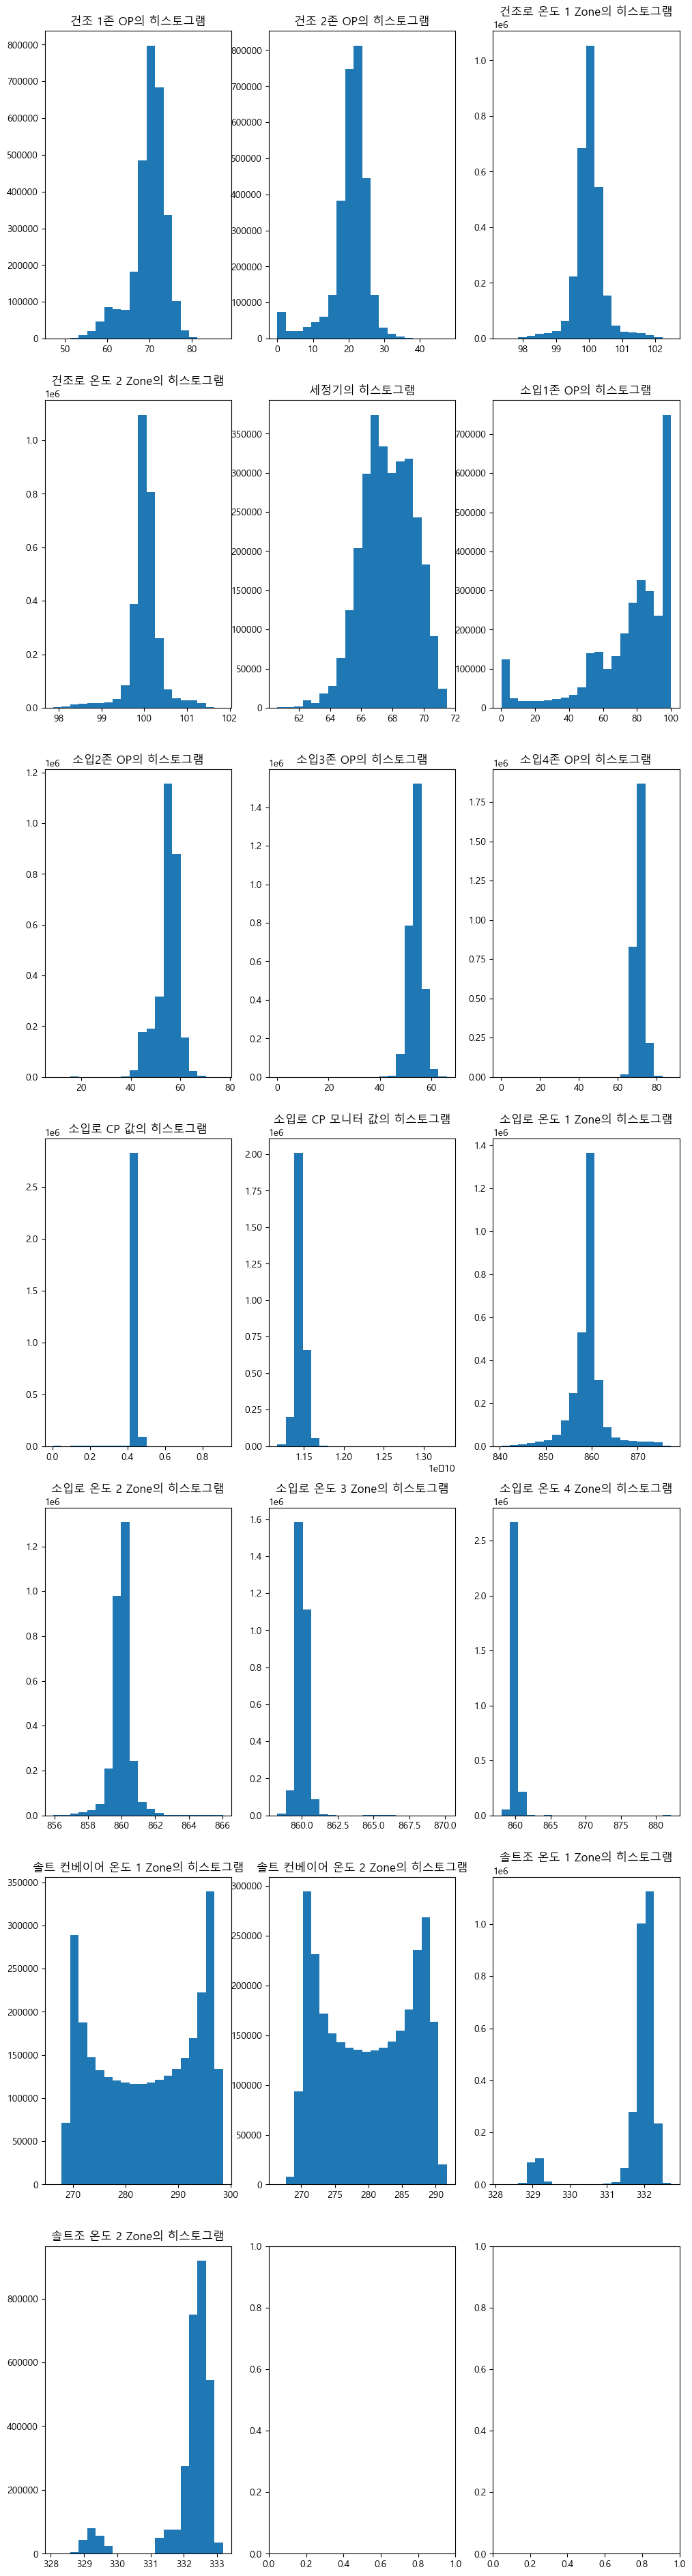

In [42]:
plt.rcParams["font.family"] = 'Malgun Gothic'

fig, axs = plt.subplots(figsize=(12,48), nrows=((df_dr.shape[1]-2)//3)+1, ncols=3)

for h in range(df_dr.shape[1]-2) : 
    axs[h // 3][h % 3].hist(df_dr.iloc[:,h+2], bins=20)
    axs[h // 3][h % 3].set_title(df_dr.columns[h+2]+"의 히스토그램")

plt.show()

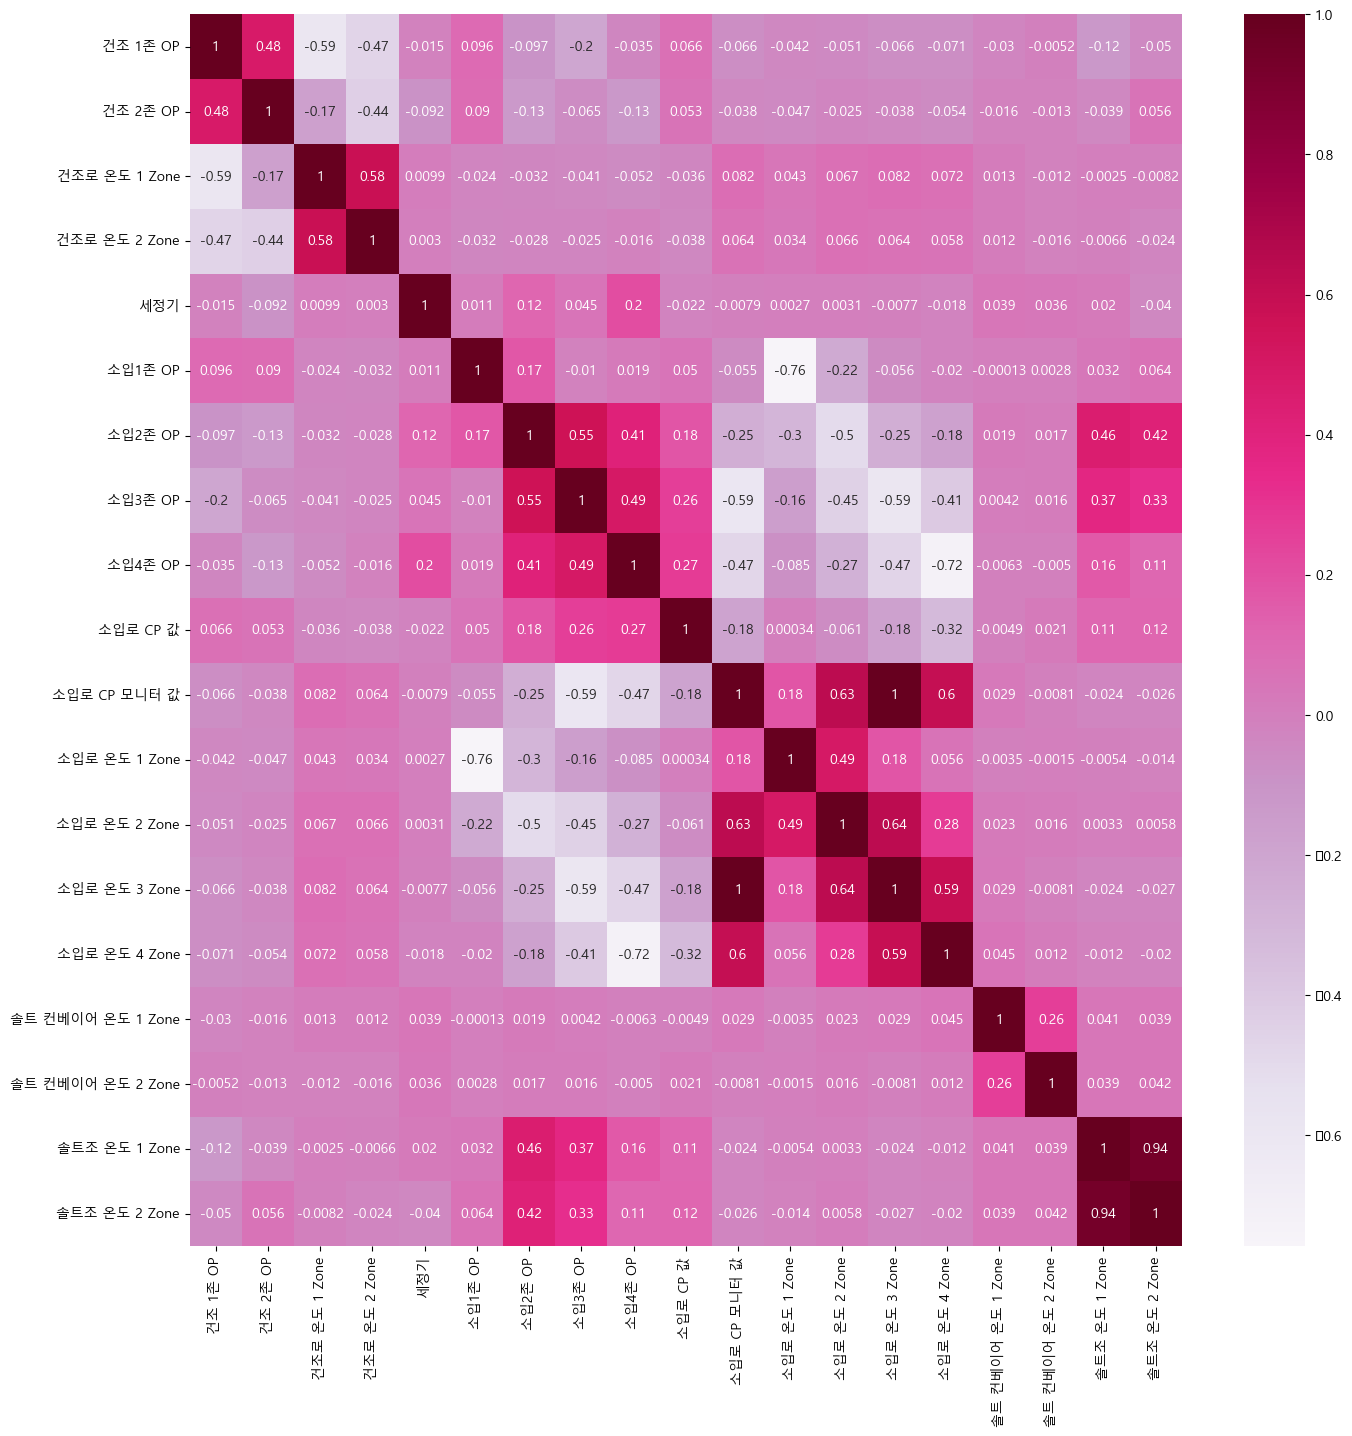

In [34]:
df_corr = df_dr.iloc[:,2:].corr("pearson")

plt.rcParams["font.family"] = "Malgun Gothic"
plt.figure(figsize=(16,16))

sns.heatmap(df_corr, cmap="PuRd", annot=True)
plt.show()

상관 계수의 절댓값이 0.3 이상인 컬럼만 추출

In [35]:
df_corr[(df_corr.abs() >= 0.3) & (df_corr.abs() != 1) & (df_corr.notnull())]

,건조 1존 OP,건조 2존 OP,건조로 온도 1 Zone,건조로 온도 2 Zone,세정기,소입1존 OP,소입2존 OP,소입3존 OP,소입4존 OP,소입로 CP 값,소입로 CP 모니터 값,소입로 온도 1 Zone,소입로 온도 2 Zone,소입로 온도 3 Zone,소입로 온도 4 Zone,솔트 컨베이어 온도 1 Zone,솔트 컨베이어 온도 2 Zone,솔트조 온도 1 Zone,솔트조 온도 2 Zone
건조 1존 OP,NaN,0.484269,-0.588422,-0.467608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
건조 2존 OP,0.484269,NaN,NaN,-0.437043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
건조로 온도 1 Zone,-0.588422,NaN,NaN,0.578325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
건조로 온도 2 Zone,-0.467608,-0.437043,0.578325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
세정기,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
소입1존 OP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.758513,NaN,NaN,NaN,NaN,NaN,NaN,NaN
소입2존 OP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.554664,0.409996,NaN,NaN,NaN,-0.498435,NaN,NaN,NaN,NaN,0.455404,0.422288
소입3존 OP,NaN,NaN,NaN,NaN,NaN,NaN,0.554664,NaN,0.494163,NaN,-0.594724,NaN,-0.447347,-0.592149,-0.407350,NaN,NaN,0.369441,0.326667
소입4존 OP,NaN,NaN,NaN,NaN,NaN,NaN,0.409996,0.494163,NaN,NaN,-0.474057,NaN,NaN,-0.469597,-0.717983,NaN,NaN,NaN,NaN
소입로 CP 값,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.319367,NaN,NaN,NaN,NaN


데이터 수집 시간과 배정 번호를 제외한 컬럼의 설명을 살펴보면,  
  
- 건조 1~2존 OP : 각 건조 온도 유지를 위한 출력 량(%)
- 건조로 온도 1~2 Zone : 각 건조로 Zone의 온도 값
- 세정기 : 세정기 온도 값
- 소입 1~4존 OP : 각 소입존 온도 유지를 위한 출력 량(%)
- 소입로 CP 값 : 침탄 가스의 침탄 능력의 양(%) >> 침탄되는 탄소의 양 >> 침탄된 탄소의 양 / 분사된 탄소 (% ?)
- 소입로 온도 1~4 Zone : 각 소입로 Zone의 온도 값
- 솔트 컨베이어 온도 1~2 Zone : 각 솔트 컨베이어 Zone의 온도 값
- 솔트조 온도 1~2 Zone : 각 솔트조 Zone의 온도 값

건조로, 소입로, 솔트조(염욕로) 전부 온도를 일정 수준 올려 유지해야하며,  
  
그에 따른 에너지 공급이 필요하다.  
  
그래서 각 노마다 'OP'라고 불리는 컬럼이 존재 >>  
  
온도 유지를 위해서는 에너지를 계속 공급해줘야 하며, 각 기기마다 최대 출력(%)이 정해진 것으로 예상됨.  
  
열처리에서 중요한 것은, 노 온도를 올리고 유지하기 위해 가해지는 에너지가 아니라,  
  
노 내부의 온도가 중요하기 때문에  
  
OP 컬럼은 전부 제외해도 무방하다고 가정

In [45]:
# 'OP'가 속해있는 컬럼 전부 제외

df_dr_cl = df_dr.drop(['건조 1존 OP', '건조 2존 OP','소입1존 OP', '소입2존 OP', '소입3존 OP', '소입4존 OP'],axis=1)

df_dr_cl.head()

,TAG_MIN,배정번호,건조로 온도 1 Zone,건조로 온도 2 Zone,세정기,소입로 CP 값,소입로 CP 모니터 값,소입로 온도 1 Zone,소입로 온도 2 Zone,소입로 온도 3 Zone,소입로 온도 4 Zone,솔트 컨베이어 온도 1 Zone,솔트 컨베이어 온도 2 Zone,솔트조 온도 1 Zone,솔트조 온도 2 Zone
2,2022-01-03 11:22:09,102410,98.8533,99.14600,68.4386,0.450341,1.145200e-10,860.338,859.780,859.981,859.724,294.658,272.538,328.734,328.805
3,2022-01-03 11:22:11,102410,98.7918,99.17675,68.4999,0.450201,1.144670e-10,860.338,859.842,859.950,859.599,294.719,272.538,328.674,328.865
4,2022-01-03 11:22:12,102410,98.7918,99.20750,68.4386,0.450235,1.145360e-10,860.351,859.791,859.991,859.731,294.721,272.599,328.740,328.808
5,2022-01-03 11:22:13,102410,98.7918,99.14600,68.4386,0.450448,1.145360e-10,860.351,859.791,859.991,859.731,294.721,272.599,328.740,328.808
6,2022-01-03 11:22:14,102410,98.7918,99.20750,68.4386,0.450571,1.145360e-10,860.351,859.854,859.991,859.731,294.781,272.599,328.740,328.869


'소입로 CP 모니터 값'의 경우,  
  
숫자의 크기가 0에 근접할 만큼 작고(최댓값이 1.329290e-10), 컬럼의 의미를 파악하기 어려움

컬럼을 제외해도 무방하다고 가정

In [46]:
# 소입로 CP 모니터 값 제외

df_dr_cl.drop("소입로 CP 모니터 값", axis=1, inplace=True)

df_dr_cl.columns

Index(['TAG_MIN', '배정번호', '건조로 온도 1 Zone', '건조로 온도 2 Zone', '세정기', '소입로 CP 값',
       '소입로 온도 1 Zone', '소입로 온도 2 Zone', '소입로 온도 3 Zone', '소입로 온도 4 Zone',
       '솔트 컨베이어 온도 1 Zone', '솔트 컨베이어 온도 2 Zone', '솔트조 온도 1 Zone',
       '솔트조 온도 2 Zone'],
      dtype='object')

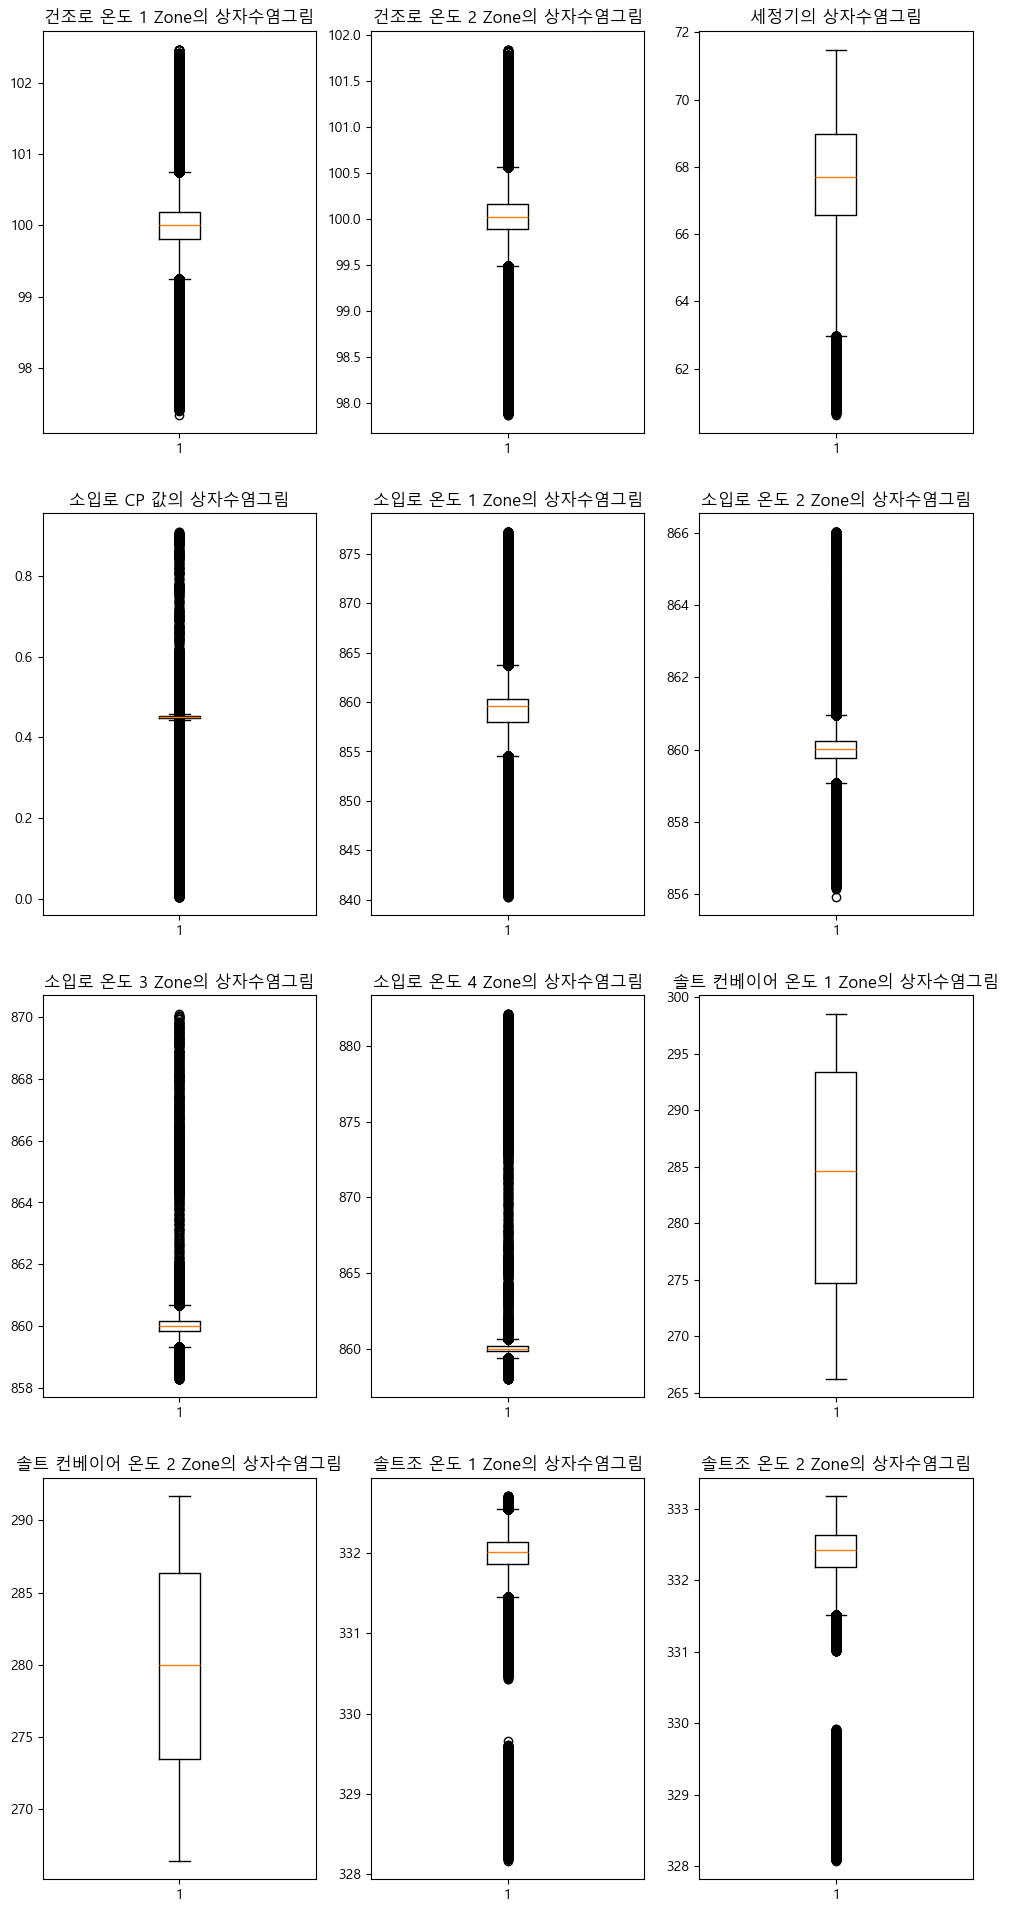

In [49]:
plt.rcParams["font.family"] = 'Malgun Gothic'

fig, axs = plt.subplots(figsize=(12,24), nrows=((df_dr_cl.shape[1]-2)//3), ncols=3)

for h in range(df_dr_cl.shape[1]-2) : 
    axs[h // 3][h % 3].boxplot(df_dr_cl.iloc[:,h+2])
    axs[h // 3][h % 3].set_title(df_dr_cl.columns[h+2]+"의 상자수염그림")

plt.show()

위 상자 수염 그림을 보기 전까지는  
  
같은 공정에서 Zone만 다른 변수를 합칠 수 있을 것이라고 생각했지만,  
  
데이터의 분포가 차이를 보임(특히 소입로 1,2,3,4).  
  
미묘한 차이에서 불량이 발생할 수 있음